In [29]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# dataframe data and metrics handling libraries
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

full = train.append(test, ignore_index=True)
titanic = full[:891]
del train, test

print('full data:', full.shape, 'titanic:',titanic.shape)

full data: (1309, 12) titanic: (891, 12)


In [31]:
# run the code to see the variables
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [32]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.096067,-0.189119,0.036847,-0.369226,-0.308247,-0.077221
Fare,0.096067,1.000000,0.216225,0.012658,-0.549500,0.159651,0.257307
Parch,-0.189119,0.216225,1.000000,-0.001652,0.018443,0.414838,0.081629
PassengerId,0.036847,0.012658,-0.001652,1.000000,-0.035144,-0.057527,-0.005007
Pclass,-0.369226,-0.549500,0.018443,-0.035144,1.000000,0.083081,-0.338481
SibSp,-0.308247,0.159651,0.414838,-0.057527,0.083081,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


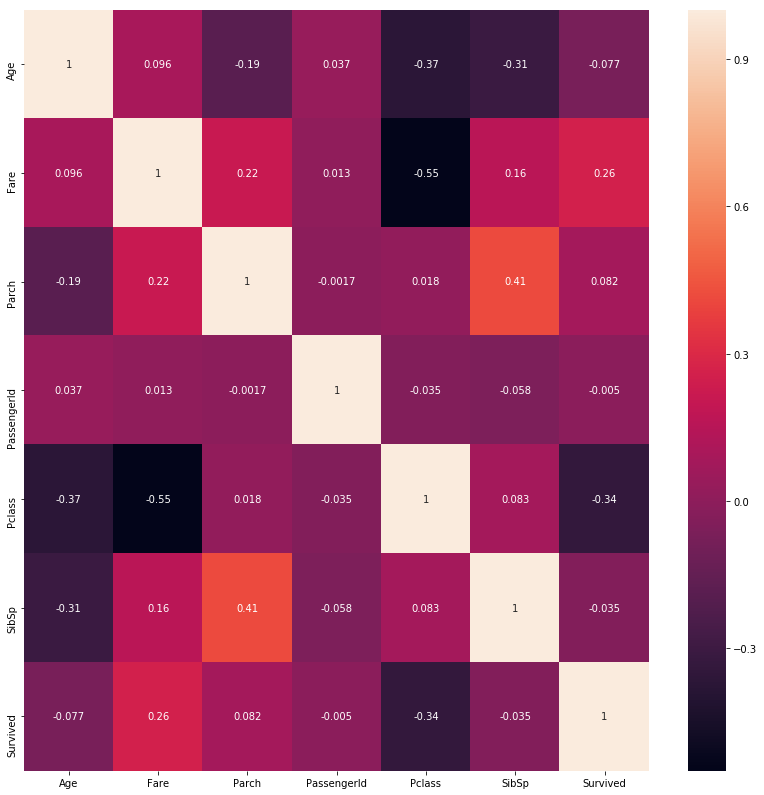

In [33]:
corr = titanic.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True)
corr

In [34]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ))
    facet.add_legend()

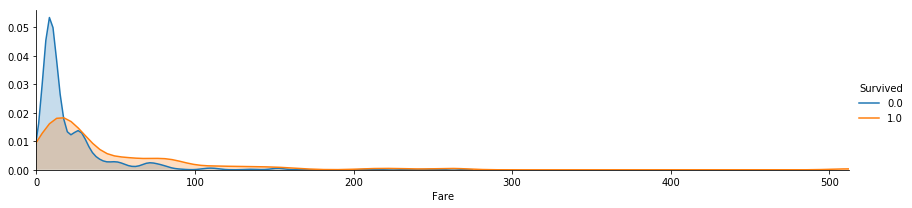

In [35]:
plot_distribution(titanic, var='Fare',target='Survived')


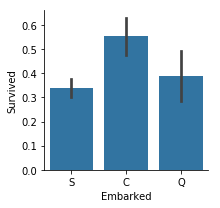

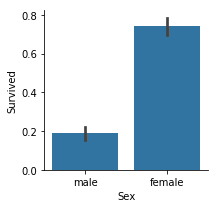

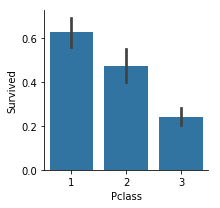

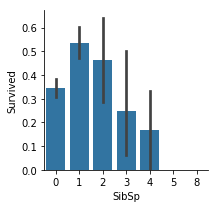

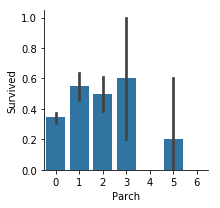

In [42]:
def plot_categories(df, cat, target, **kwarges):
    row = kwarges.get('row' ,None)
    col = kwarges.get('col', None)
    facet = sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()
plot_categories(titanic, cat='Embarked', target='Survived')
plot_categories(titanic, cat='Sex', target='Survived')
plot_categories(titanic, cat='Pclass', target='Survived')
plot_categories(titanic, cat='SibSp', target='Survived')
plot_categories(titanic, cat='Parch', target='Survived')